In [1]:
import pandas as pd
from ci_trade.process import _get_indicator_data, _exponential_smooth, _produce_prediction
from ci_trade.train import cross_validation
from ci_trade.test import returns, calculate_max_drawdown, calculate_sharpe_ratio

In [65]:
df_main = pd.read_csv('../data/nifty50_22_years.csv', usecols=['open', 'high', 'low', 'close'])
df_main = _get_indicator_data(df_main)
df_main.dropna(inplace=True)
df_main
period = 1000 # number of days to test on => 1000 means roughly 4 years
df_train = df_main[:-period].reset_index(drop=True)
df_test = df_main[-period:].reset_index(drop=True)

/home/vihaanthora/lab/ci/spp/venv/lib/python3.10/site-packages/finta/finta.py:292: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  sc.iteritems(), sma.shift().iteritems(), ohlc[column].iteritems()
/home/vihaanthora/lab/ci/spp/venv/lib/python3.10/site-packages/finta/finta.py:292: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  sc.iteritems(), sma.shift().iteritems(), ohlc[column].iteritems()


In [66]:
df_train

,close,SMA5,SMA10,SMA15,SMA20,EMA5,EMA10,EMA15,EMA20,upperband,...,fastd,fastrsi,ULTOSC,WILLR,ATR7,ATR14,Trange,TYPPRICE,VIm,VIp
0,1710.40,1726.26,1724.930,1713.693333,1679.3350,1720.018803,1714.766478,1703.641662,1693.617913,1816.448188,...,48.759467,0.604399,33.454382,-59.350041,62.357143,55.467857,57.80,1722.233333,0.841993,1.113193
1,1722.50,1720.06,1722.730,1719.420000,1688.1500,1720.845869,1716.173032,1706.010300,1696.419734,1811.168467,...,46.012933,0.600239,36.399809,-63.156157,64.192857,56.639286,55.90,1706.633333,0.921685,1.028501
2,1654.80,1703.22,1717.960,1718.893333,1693.4150,1698.830578,1705.011317,1699.582071,1692.389385,1799.263278,...,30.775654,0.585233,33.607107,-85.166840,79.371429,62.925000,156.95,1688.150000,0.932800,0.945627
3,1712.70,1706.48,1718.120,1720.433333,1699.6500,1703.453719,1706.409565,1701.227847,1694.353073,1793.346498,...,32.232619,0.574025,38.229136,-54.979145,86.214286,68.196429,97.90,1690.200000,0.979838,0.929667
4,1696.50,1699.38,1713.560,1719.453333,1704.5800,1701.135812,1704.607503,1700.634964,1694.560344,1785.197579,...,32.142857,0.557441,35.340318,-63.425443,91.400000,69.864286,83.80,1720.133333,0.994275,0.973213
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4539,10516.70,10667.75,10712.790,10706.580000,10683.9200,10632.516547,10670.037851,10666.508817,10649.235466,10849.336853,...,9.825542,0.577258,35.021078,-97.425602,103.971429,94.867857,115.90,10548.066667,1.069909,0.816851
4540,10536.70,10614.72,10694.680,10693.070000,10681.5200,10600.577698,10645.794605,10650.282715,10638.517803,10854.230230,...,5.080581,0.558751,32.656188,-89.479084,100.050000,92.953571,68.05,10528.616667,1.139547,0.812733
4541,10430.35,10552.57,10663.545,10673.890000,10672.3200,10543.835132,10606.622859,10622.791126,10618.692298,10876.780096,...,5.183121,0.538360,28.876113,-97.545952,108.450000,96.221429,118.90,10460.566667,1.103519,0.794188
4542,10513.85,10518.80,10643.275,10662.836667,10669.4850,10533.840088,10589.755066,10609.173485,10608.707317,10881.325822,...,10.585580,0.527826,36.929042,-81.218224,103.814286,97.400000,115.35,10489.600000,1.086316,0.831769


['close' 'SMA5' 'SMA10' 'SMA15' 'SMA20' 'EMA5' 'EMA10' 'EMA15' 'EMA20'
 'upperband' 'middleband' 'lowerband' 'KAMA10' 'KAMA20' 'SAR' 'TRIMA5'
 'TRIMA10' 'TRIMA20' 'ADX5' 'ADX10' 'ADX20' 'CCI5' 'CCI10' 'CCI15'
 'MACD510' 'MACD520' 'MACD1020' 'MACD1520' 'MACD1226' 'MOM10' 'MOM15'
 'MOM20' 'ROC5' 'ROC10' 'ROC20' 'PPO' 'RSI14' 'RSI8' 'fastk' 'fastd'
 'fastrsi' 'ULTOSC' 'WILLR' 'ATR7' 'ATR14' 'Trange' 'TYPPRICE' 'VIm' 'VIp'
 'pred']


<Axes: >

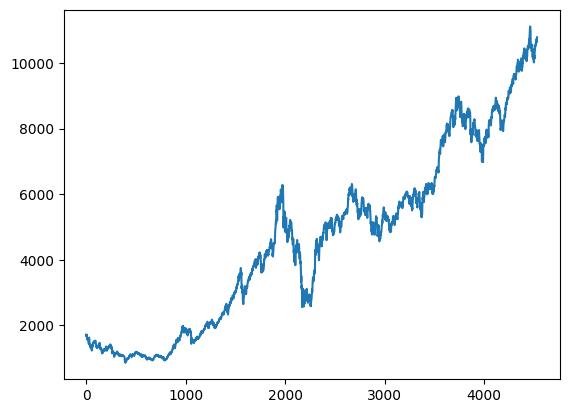

In [114]:
data = _exponential_smooth(df_train, 0.8)
data = _produce_prediction(data, lookahead=10)
data.dropna(inplace=True)
print(data.columns.values)
data['close'].plot()

In [115]:
modelRF, modelXT = cross_validation(data)

window: (0, 40)
RF 0.875, XT 0.875
window: (32, 72)
RF 1.0, XT 1.0
window: (64, 104)
RF 0.75, XT 0.625
window: (96, 136)
RF 0.125, XT 0.25
window: (128, 168)
RF 0.875, XT 1.0
window: (160, 200)
RF 0.875, XT 0.5
window: (192, 232)
RF 0.5, XT 0.625
window: (224, 264)
RF 0.875, XT 0.75
window: (256, 296)
RF 0.375, XT 0.375
window: (288, 328)
RF 0.875, XT 0.875
window: (320, 360)
RF 0.0, XT 0.0
window: (352, 392)
RF 0.75, XT 0.75
window: (384, 424)
RF 1.0, XT 1.0
window: (416, 456)
RF 0.5, XT 0.5
window: (448, 488)
RF 0.75, XT 0.875
window: (480, 520)
RF 0.875, XT 0.875
window: (512, 552)
RF 0.75, XT 0.5
window: (544, 584)
RF 0.25, XT 0.25
window: (576, 616)
RF 0.125, XT 1.0
window: (608, 648)
RF 0.5, XT 0.5
window: (640, 680)
RF 0.875, XT 0.625
window: (672, 712)
RF 0.5, XT 0.5
window: (704, 744)
RF 1.0, XT 1.0
window: (736, 776)
RF 0.75, XT 0.5
window: (768, 808)
RF 1.0, XT 1.0
window: (800, 840)
RF 0.875, XT 0.875
window: (832, 872)
RF 1.0, XT 1.0
window: (864, 904)
RF 1.0, XT 1.0
windo

In [116]:
import pickle

filename1 = "../pretrained_models/rf_model.pickle"
filename2 = "../pretrained_models/xt_model.pickle"

# save model
pickle.dump(modelRF, open(filename1, "wb"))
pickle.dump(modelXT, open(filename2, "wb"))
# load model
modelRF = pickle.load(open(filename2, "rb"))
modelXT = pickle.load(open(filename2, "rb"))

cumulative return is 292.37%
annual return is 41.13%


<Axes: >

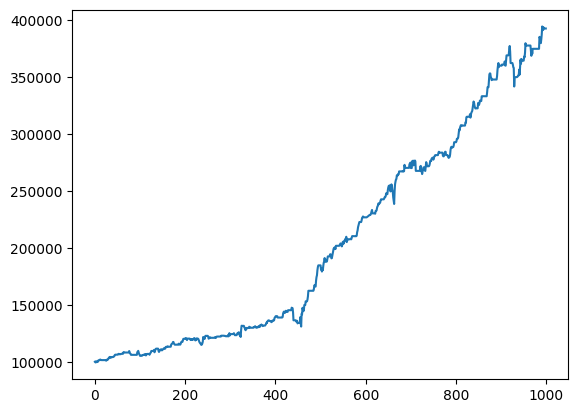

In [139]:
cumulative_return = returns(modelXT, df_test, 100000, alpha=0.7, vol=50, window=10, exp=2.5)
annualized_return = (cumulative_return)**(252/period)
print(f"cumulative return is {(cumulative_return-1)*100:.2f}%")
print(f"annual return is {(annualized_return-1)*100:.2f}%")
df_test['pnl'].plot()

In [140]:
max_drawdown = calculate_max_drawdown(df_test['pnl'])
print(f"Maximum Drawdown: {max_drawdown*100:.2f}%")

Maximum Drawdown: -11.23%


In [141]:
sharpe_ratio = calculate_sharpe_ratio(df_test['pnl'], 0.15) # 15% risk free rate
print(f"Sharpe Ratio: {sharpe_ratio:.2f}")

Sharpe Ratio: 1.57
